## Water Jug Problem using DFS
*You are given:* 
1. A jug A with capacity x liters
2. A jug B with capacity y liters
3. An objective to measure exactly z liters

*You can:*
1. Fill any jug completely
2. Empty any jug
3. Pour water from one jug to the other until one is either full or empty

In [11]:
# Generate all the possible states and transitions for the water jug problem
def generate_graph(jug1, jug2):
    graph = {}
    for x in range(jug1 + 1):
        for y in range(jug2 + 1):
            state = (x, y)
            graph[state] = []
            # Fill jug1
            graph[state].append((jug1, y))
            # Fill jug2
            graph[state].append((x, jug2))
            # Empty jug1
            graph[state].append((0, y))
            # Empty jug2
            graph[state].append((x, 0))
            # Pour jug1 to jug2
            pour_to_jug2 = min(x, jug2 - y)
            graph[state].append((x - pour_to_jug2, y + pour_to_jug2))
            # Pour jug2 to jug1
            pour_to_jug1 = min(y, jug1 - x)
            graph[state].append((x + pour_to_jug1, y - pour_to_jug1))
    return graph

In [12]:
jug1 = 5
jug2 = 3
target = 4

graph = generate_graph(jug1, jug2)

# Print the graph
for state, neighbors in graph.items():
    print(f"{state}: {neighbors}")

(0, 0): [(5, 0), (0, 3), (0, 0), (0, 0), (0, 0), (0, 0)]
(0, 1): [(5, 1), (0, 3), (0, 1), (0, 0), (0, 1), (1, 0)]
(0, 2): [(5, 2), (0, 3), (0, 2), (0, 0), (0, 2), (2, 0)]
(0, 3): [(5, 3), (0, 3), (0, 3), (0, 0), (0, 3), (3, 0)]
(1, 0): [(5, 0), (1, 3), (0, 0), (1, 0), (0, 1), (1, 0)]
(1, 1): [(5, 1), (1, 3), (0, 1), (1, 0), (0, 2), (2, 0)]
(1, 2): [(5, 2), (1, 3), (0, 2), (1, 0), (0, 3), (3, 0)]
(1, 3): [(5, 3), (1, 3), (0, 3), (1, 0), (1, 3), (4, 0)]
(2, 0): [(5, 0), (2, 3), (0, 0), (2, 0), (0, 2), (2, 0)]
(2, 1): [(5, 1), (2, 3), (0, 1), (2, 0), (0, 3), (3, 0)]
(2, 2): [(5, 2), (2, 3), (0, 2), (2, 0), (1, 3), (4, 0)]
(2, 3): [(5, 3), (2, 3), (0, 3), (2, 0), (2, 3), (5, 0)]
(3, 0): [(5, 0), (3, 3), (0, 0), (3, 0), (0, 3), (3, 0)]
(3, 1): [(5, 1), (3, 3), (0, 1), (3, 0), (1, 3), (4, 0)]
(3, 2): [(5, 2), (3, 3), (0, 2), (3, 0), (2, 3), (5, 0)]
(3, 3): [(5, 3), (3, 3), (0, 3), (3, 0), (3, 3), (5, 1)]
(4, 0): [(5, 0), (4, 3), (0, 0), (4, 0), (1, 3), (4, 0)]
(4, 1): [(5, 1), (4, 3), (0, 1)

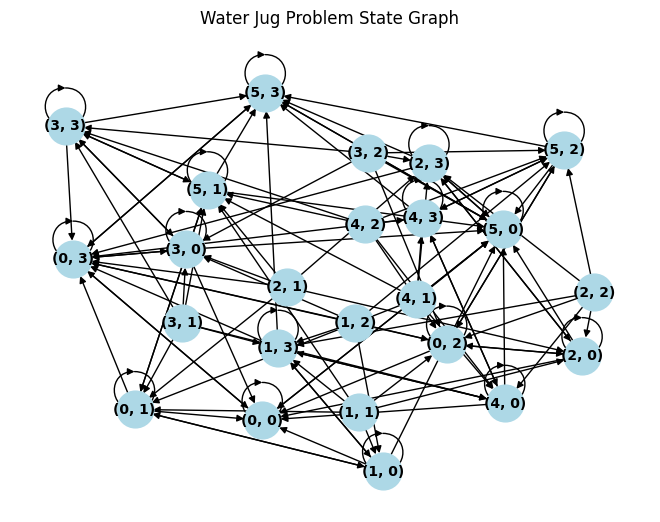

In [13]:
#Visualize the graph using networkx and matplotlib
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
for state, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(state, neighbor)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Water Jug Problem State Graph")
plt.show()

In [14]:
def dfs_graph(graph, start, target):
    stack = [(start, [start])]
    visited = set()

    while stack:
        current, path = stack.pop()
        if current in visited:
            continue
        visited.add(current)

        if target in current:
            return path

        for neighbor in graph[current]:
            if neighbor not in visited:
                stack.append((neighbor, path + [neighbor]))

    return None

In [15]:
solution = dfs_graph(graph, (0, 0), target)

print("Solution path:")
for step in solution:
    print(step)

Solution path:
(0, 0)
(0, 3)
(3, 0)
(3, 3)
(5, 1)
(5, 0)
(2, 3)
(2, 0)
(0, 2)
(5, 2)
(4, 3)
